# Bike Sharing Demand 

![그림주소](https://storage.googleapis.com/kaggle-competitions/kaggle/3948/logos/front_page.png)

- 참고 : [캐글 사이트](https://www.kaggle.com/c/bike-sharing-demand)

# 1. Loading Library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. Loading Data

In [4]:
train = pd.read_csv('C:\\ai\\workspace\\data\\bike\\train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### 변수설명

- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

In [5]:
test = pd.read_csv('C:\\ai\\workspace\\data\\bike\\test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
train = train.drop(['casual', 'registered'], axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [8]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [10]:
datetime = train['datetime']
datetime.head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [11]:
train['year'] = datetime.dt.year
train['year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

In [12]:
train['month'] = datetime.dt.month
train['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [13]:
train['day'] = datetime.dt.day
train['day'].head()

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int64

In [14]:
train['hour'] = datetime.dt.hour
train['hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [15]:
train['minute'] = datetime.dt.minute
train['minute'].head()

0    0
1    0
2    0
3    0
4    0
Name: minute, dtype: int64

In [16]:
train['second'] = datetime.dt.second
train['second'].head()

0    0
1    0
2    0
3    0
4    0
Name: second, dtype: int64

In [17]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,0,0


In [18]:
train['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [19]:
train['minute'].value_counts()

0    10886
Name: minute, dtype: int64

In [20]:
train['second'].value_counts()

0    10886
Name: second, dtype: int64

In [21]:
train = train.drop(['minute', 'second'], axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


# 3. EDA

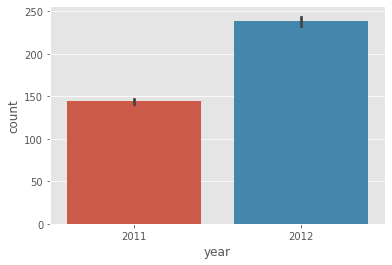

In [22]:
# 연도
sns.barplot(data=train, x='year', y='count')

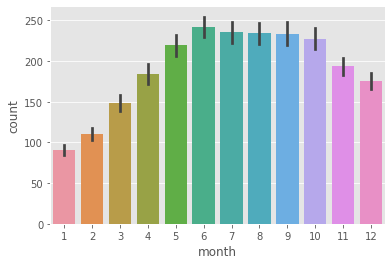

In [23]:
# 월
sns.barplot(data=train, x='month', y='count')

- 5월부터 10월까지 높은 이용률을 보이고, 날씨가 상대적으로 추운 11월~3월 사이에는 낮은 이용률을 보인다.

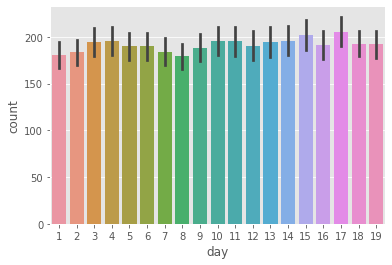

In [24]:
# 일
sns.barplot(data=train, x='day', y='count')

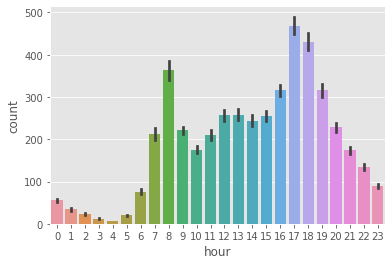

In [25]:
# 시간
sns.barplot(data=train, x='hour', y='count') 

- 출근시간과 퇴근시간에 이용 횟수가 높은 것을 확인할 수 있다.

In [26]:
train['dayofweek'] = datetime.dt.dayofweek
train['dayofweek'].head()

0    5
1    5
2    5
3    5
4    5
Name: dayofweek, dtype: int64

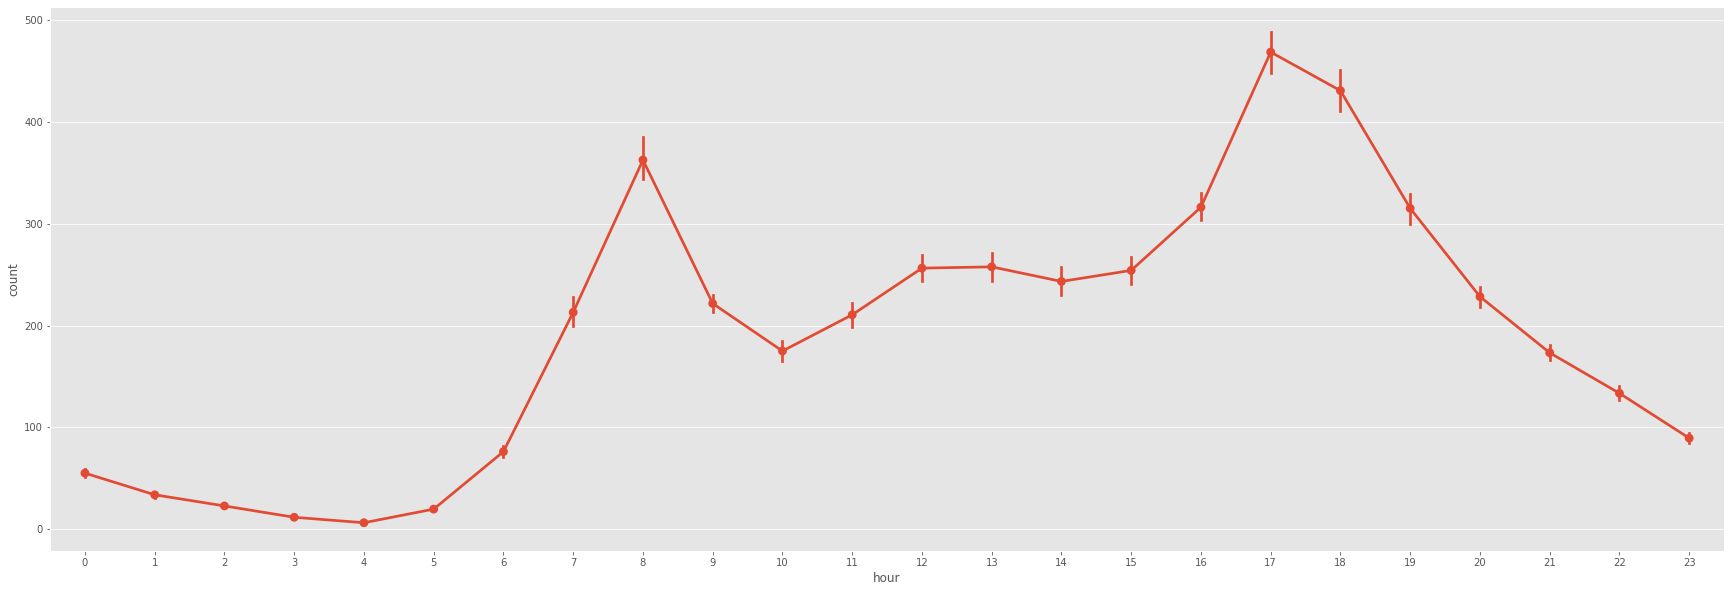

In [27]:
# 시간
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count')

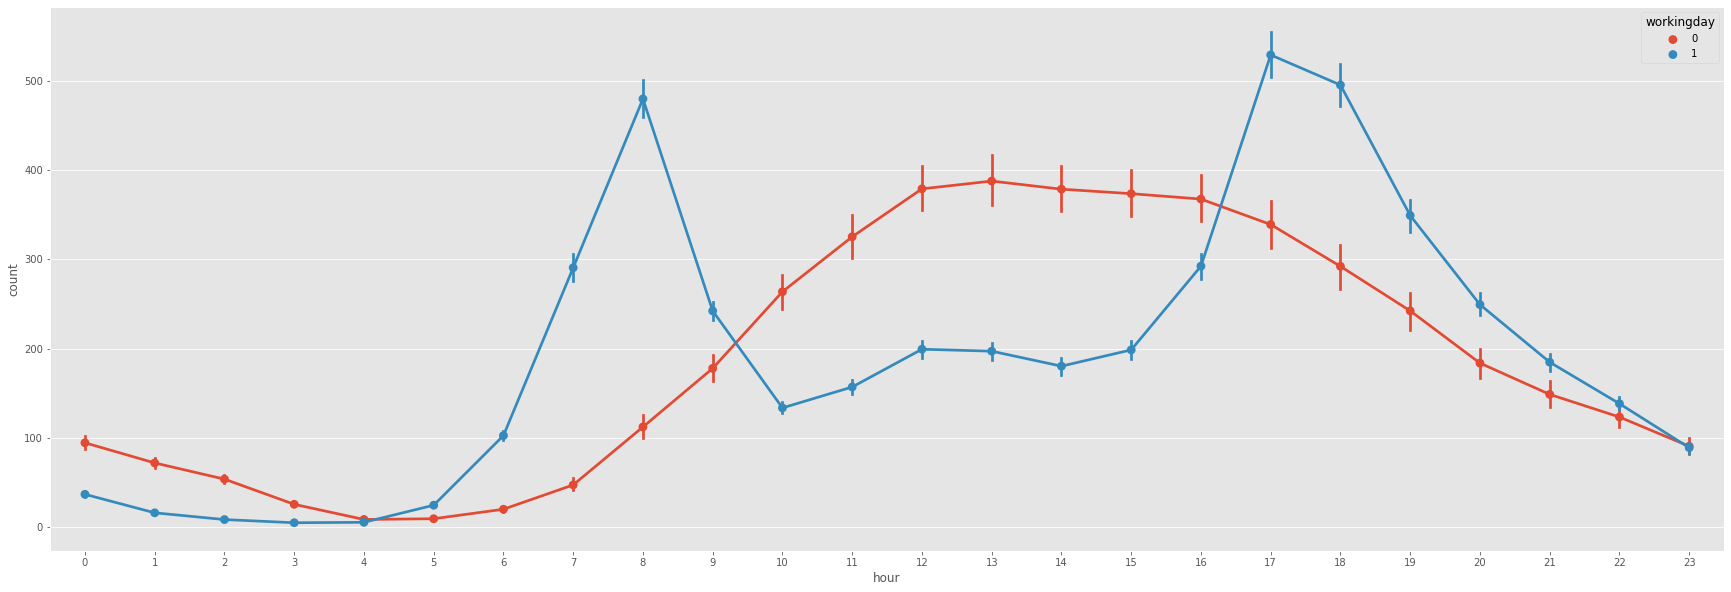

In [28]:
# 시간 & 주말여부
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count', hue='workingday')

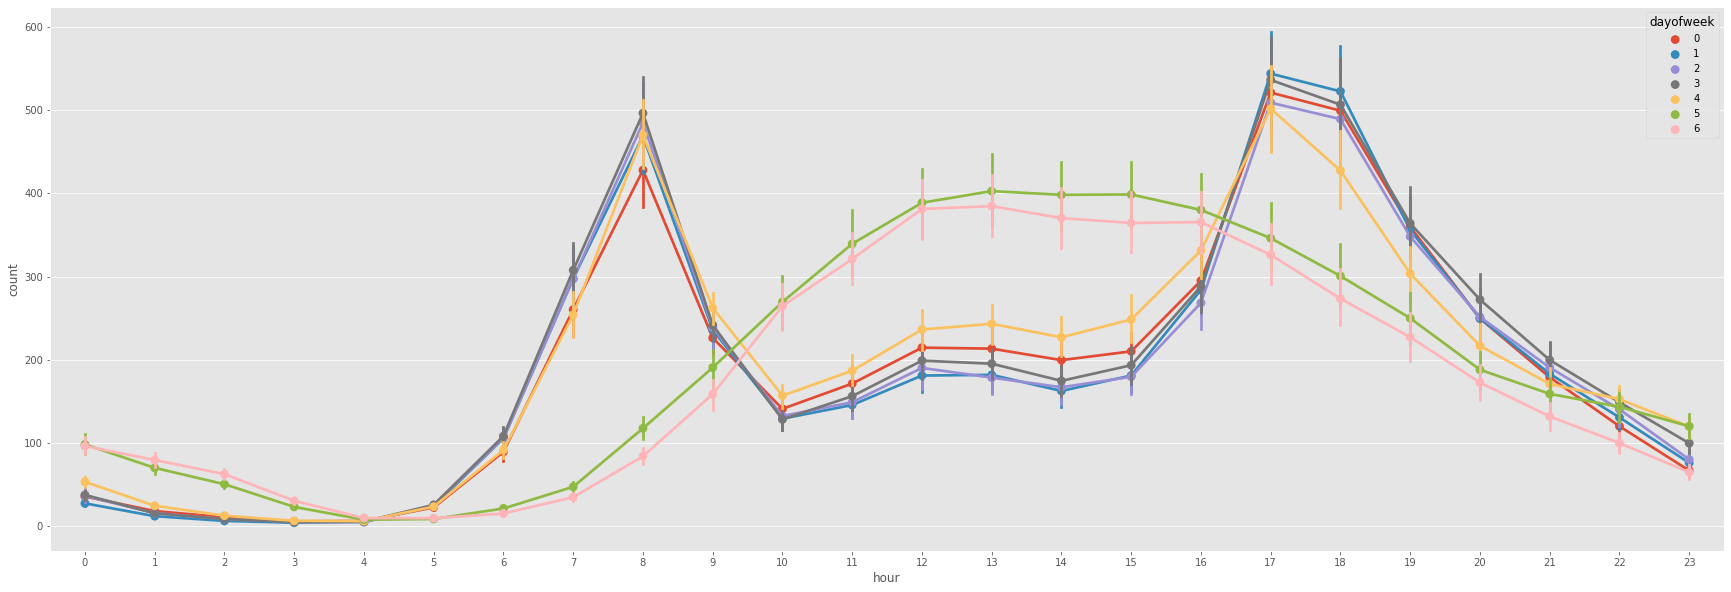

In [29]:
# 시간 & 요일
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count', hue = 'dayofweek')

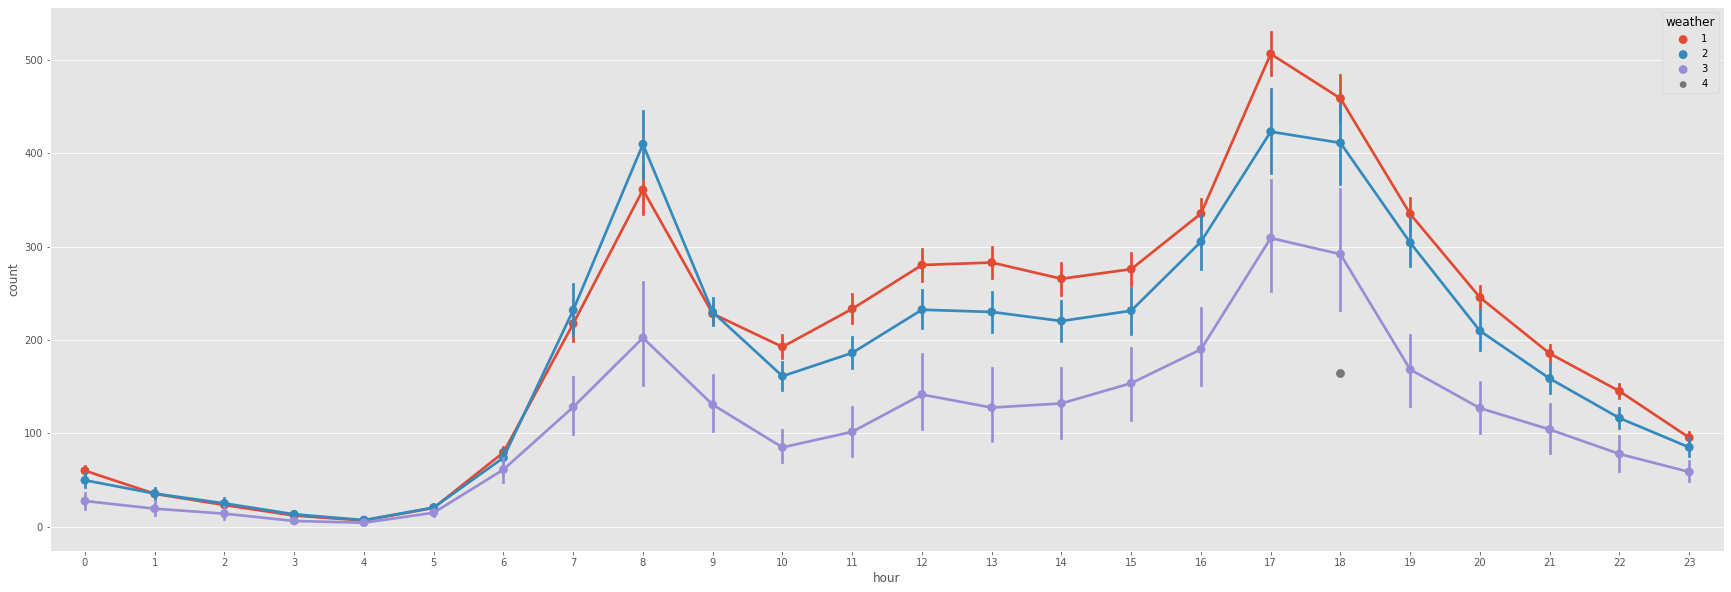

In [30]:
# 시간 & 날씨
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count', hue = 'weather')

- 4번 날씨(기상 악화)일 때 이용이 거의 저조한 것을 확인할 수 있다.

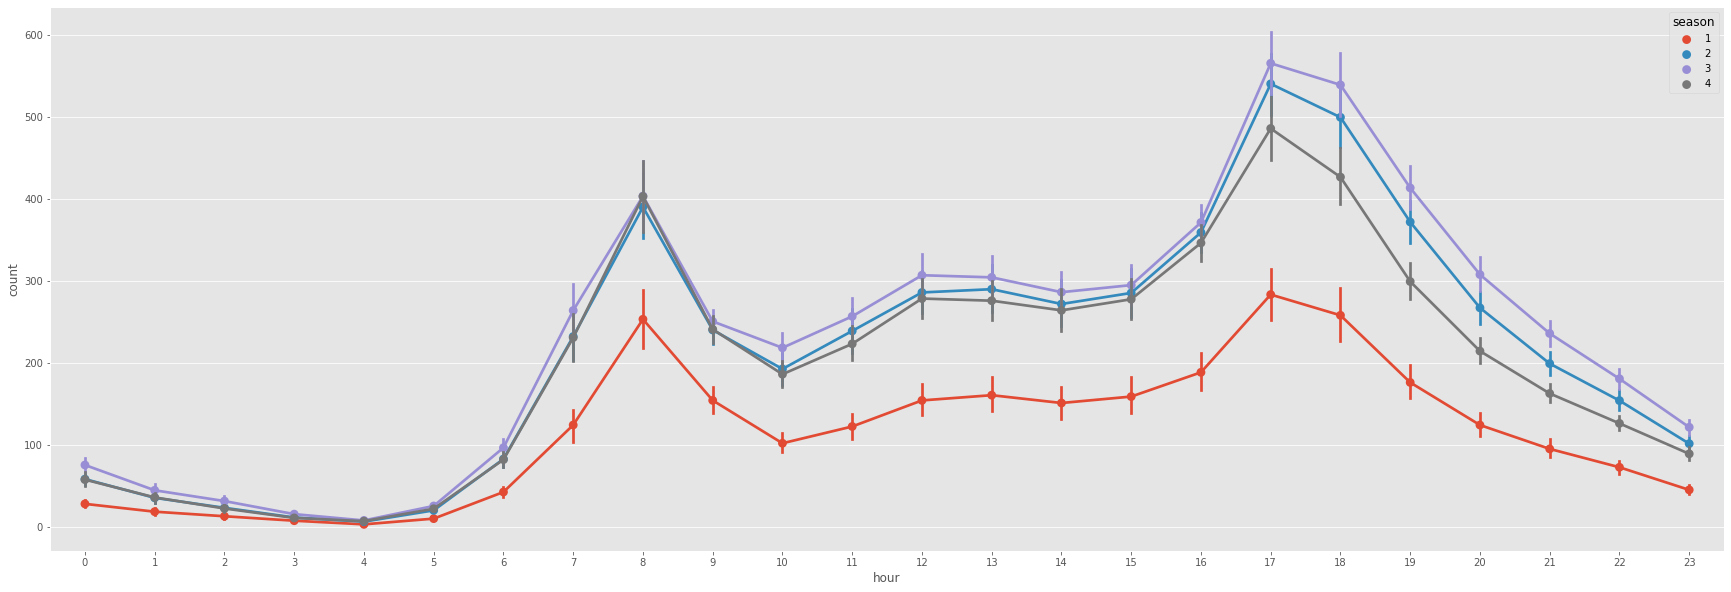

In [31]:
# 시간 & 계절
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count', hue = 'season')

- 상대적으로 봄에 이용이 적은 것을 확인할 수 있다.

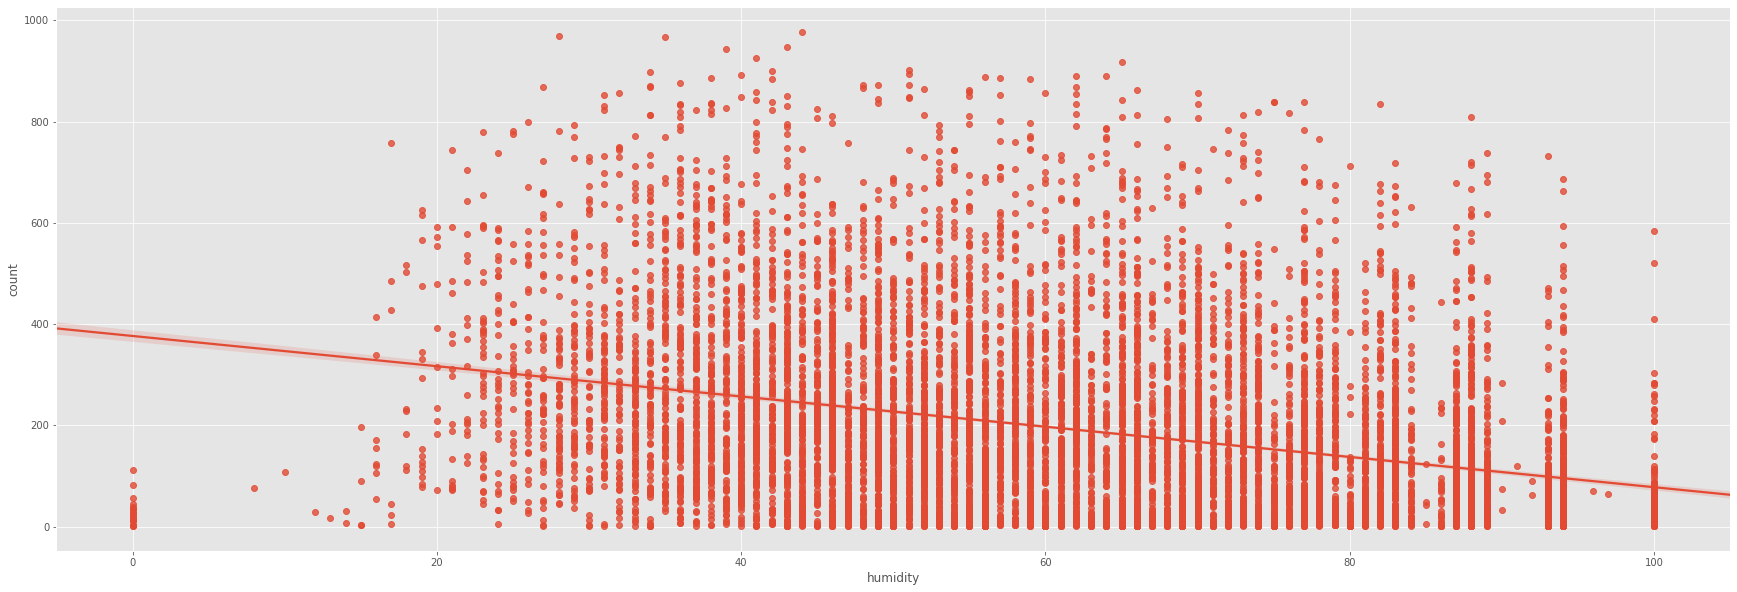

In [32]:
# 습도
plt.figure(figsize=(30,10))
sns.regplot(data=train, x='humidity', y='count')

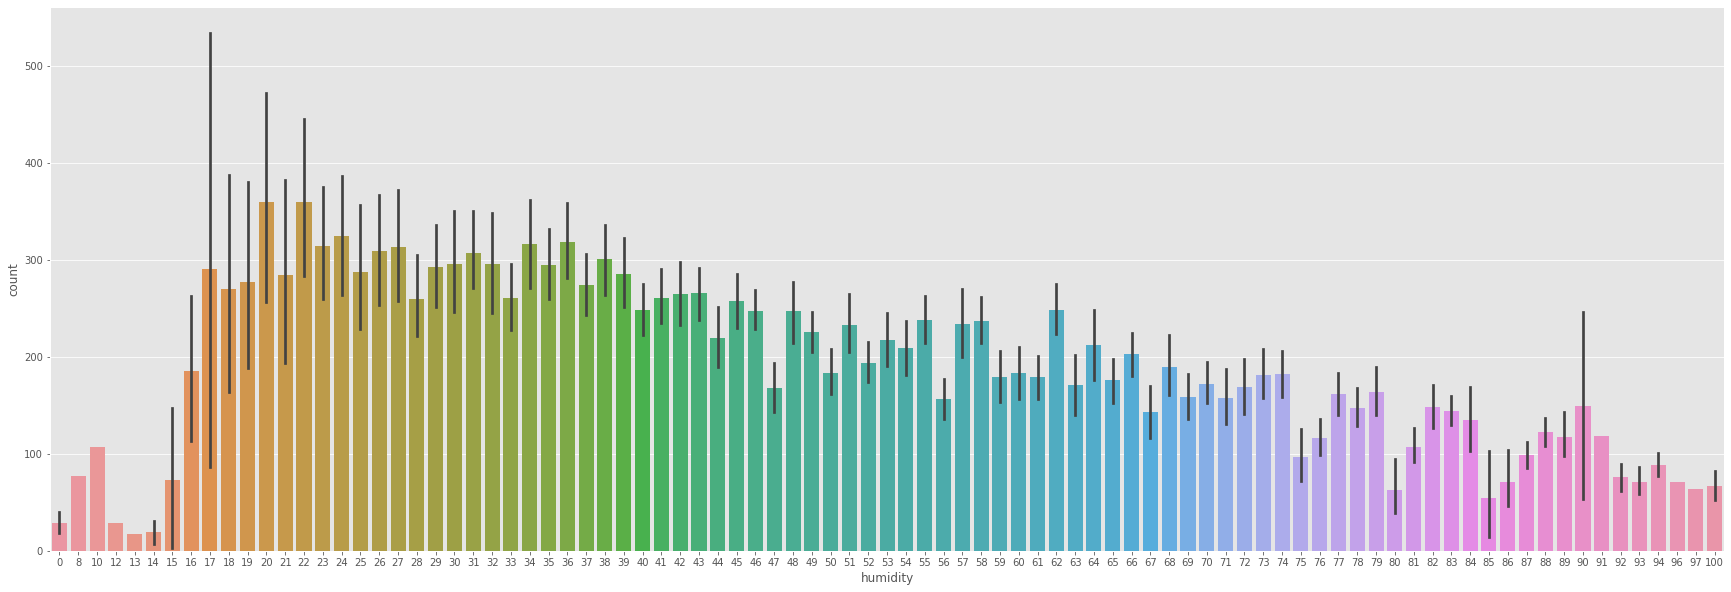

In [33]:
# 습도
plt.figure(figsize=(30,10))
sns.barplot(data=train, x='humidity', y='count')

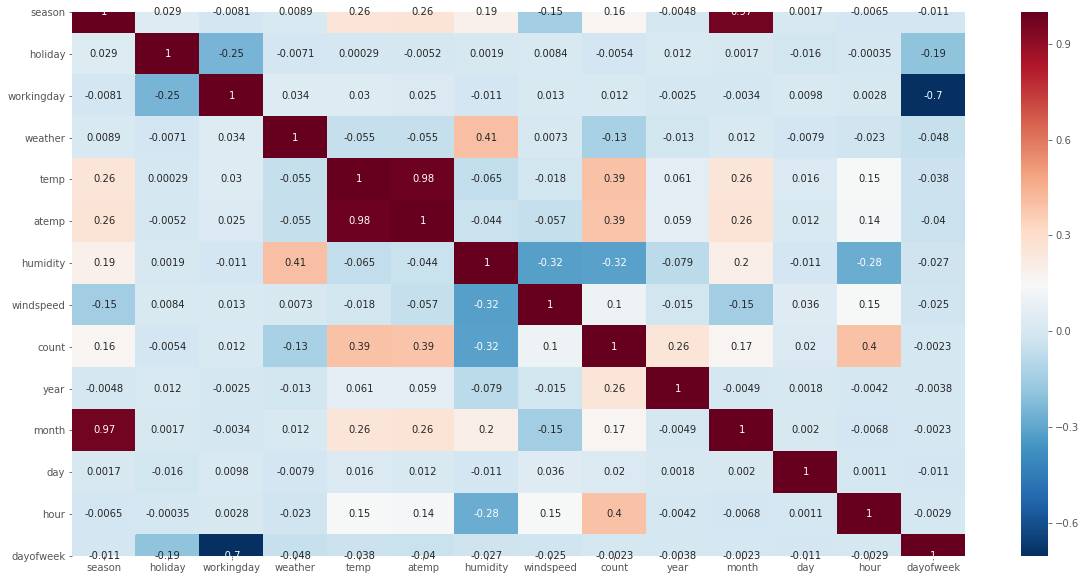

In [34]:
# 변수간 상관관계
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train.corr(), annot = True, cmap='RdBu_r')

In [35]:
train.corr()['count'].apply(lambda x : np.abs(x)).sort_values(ascending=False)

count         1.000000
hour          0.400601
temp          0.394454
atemp         0.389784
humidity      0.317371
year          0.260403
month         0.166862
season        0.163439
weather       0.128655
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday       0.005393
dayofweek     0.002283
Name: count, dtype: float64

- hour, temp, atemp, humidity, year, month, season, weather 순서로 count와 상관관계가 높음.

# 4. Data Preprocessing

In [36]:
# 결측치
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
year          0
month         0
day           0
hour          0
dayofweek     0
dtype: int64

In [37]:
train[train['windspeed']==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,232,2012,12,17,12,0
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,211,2012,12,17,15,0
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,662,2012,12,18,8,1
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,132,2012,12,18,22,1


In [38]:
# windspeed 0 결측치로 만들어 채워넣기
train.set_index('datetime', inplace=True)
train.loc[train['windspeed'] == 0, "windspeed"] = np.nan
train.interpolate(method='time', inplace=True)
train.fillna(0, inplace=True)
train.reset_index(inplace=True)

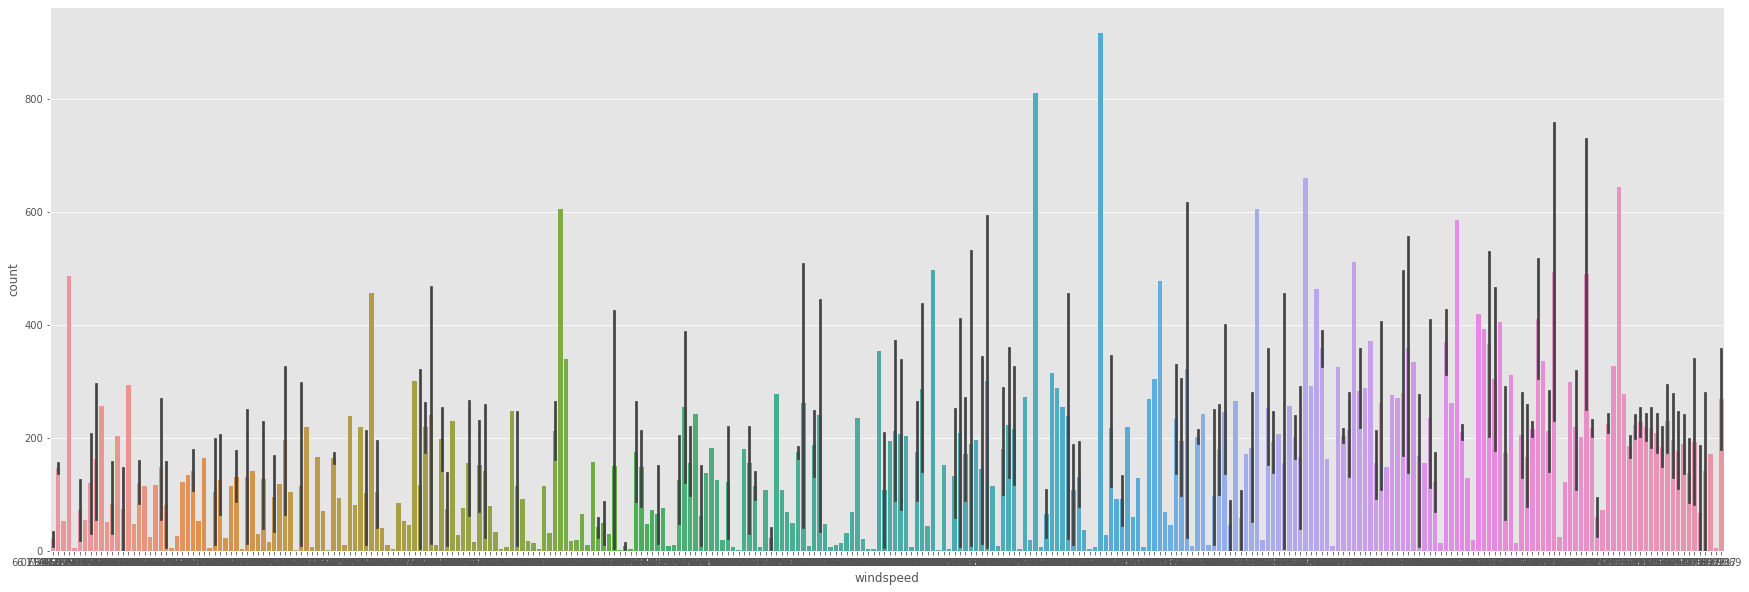

In [39]:
# 바람
plt.figure(figsize=(30,10))
sns.barplot(data=train, x='windspeed', y='count')

In [40]:
# 이상치 제거
def del_outlier(data, feature):
    q1 = np.percentile(feature, 25)
    q3 = np.percentile(feature, 75)
    IQR = q3-q1
    new_data = data[(feature>=q1-(1.5*IQR)) & (feature<=q3+(1.5*IQR))]
    return new_data

In [41]:
print(train.shape)
print(del_outlier(train, train['count']).shape)

(10886, 15)
(10586, 15)


In [42]:
# 전체 변수의 이상치 제거
for col in train.columns:
    if col != 'datetime' :
        train = del_outlier(train, train[col])

In [43]:
print(train.shape)

(9857, 15)


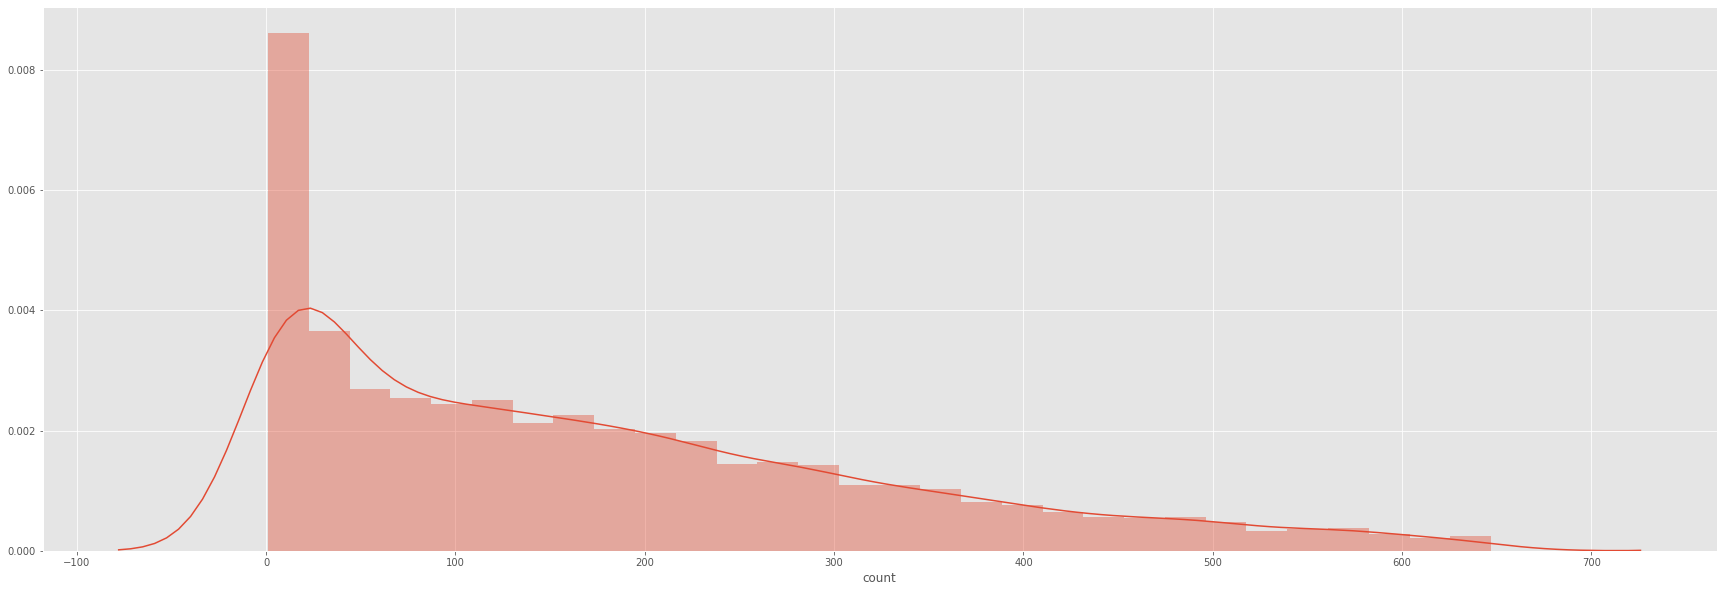

In [44]:
# 분포
plt.figure(figsize = (30,10))
sns.distplot(train['count'])

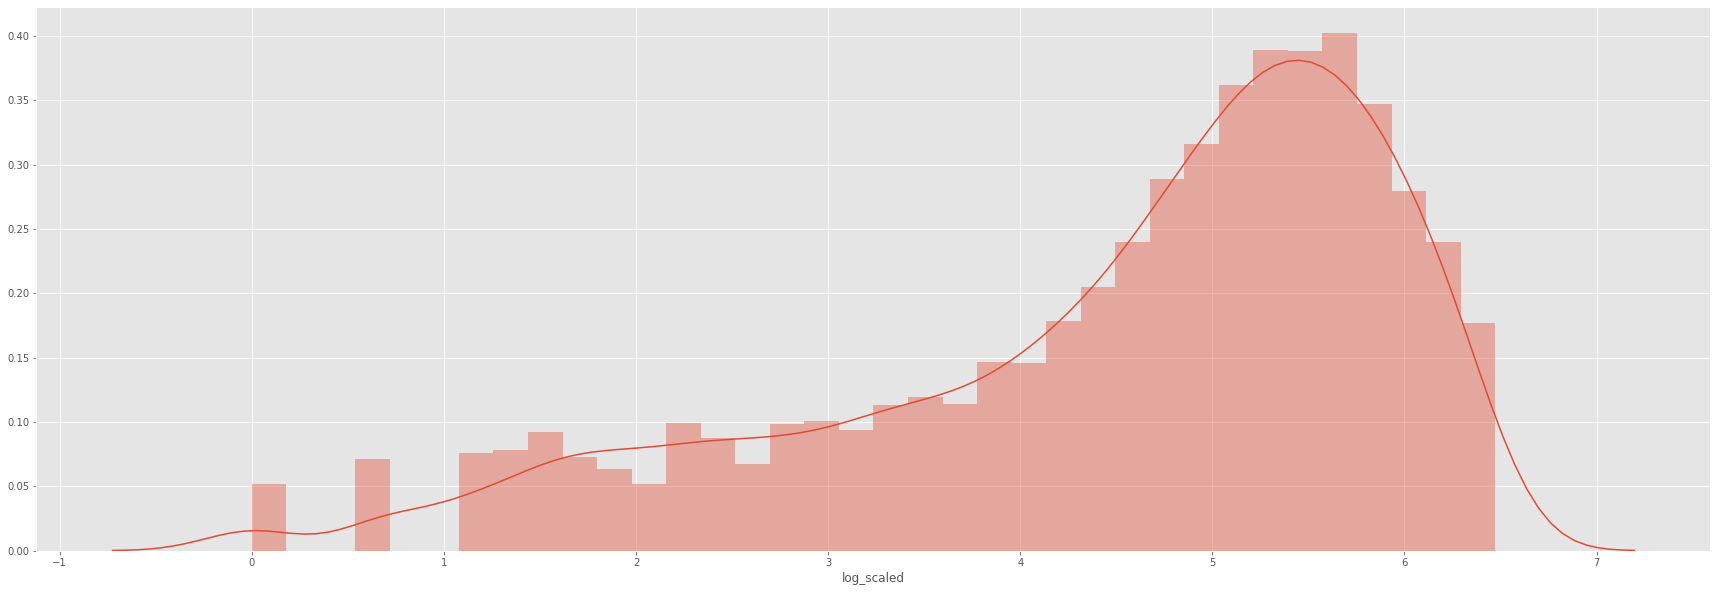

In [45]:
# log scale 후 데이터 분포 보기
train['log_scaled'] = np.log(train['count'])
plt.figure(figsize = (30,10))
sns.distplot(train['log_scaled'])

In [46]:
train.head().transpose()

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0,0,0,0,0
count,16,40,32,13,1


In [47]:
# workingday 기준으로 데이터를 split 하여 학습한다.
nowork_train = train[train['workingday']==0]
work_train = train[train['workingday']==1]

In [48]:
print(nowork_train.shape)
print(work_train.shape)

(3005, 16)
(6852, 16)


# 5. Modeling

In [49]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [50]:
def std_scale(data):
    scaler = StandardScaler()
    scaler.fit(data)
    scaled_data = pd.DataFrame(scaler.transform(data), columns = data.columns)
    return scaled_data

In [51]:
def fit_eval(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    
    yLog_train = np.log1p(y_train)
    yLog_test = np.log1p(y_test)
    
    lr = LinearRegression()
    lr.fit(X_train, yLog_train)
    pred_test = lr.predict(X_test)
    
    MSE = mean_squared_error(pred_test, yLog_test)
    RMSLE = rmsle(np.exp(yLog_test),np.exp(pred_test),False)
    score = lr.score(X_test, yLog_test)
    
    print('MSE : ', MSE)
    print ("RMSLE Value For Linear Regression: ",RMSLE)
    print('score : ',score)
    
    return pred_test, MSE, RMSLE, score

In [52]:
def ensemble_model(data1, data2) :
       
    y1 = data1['count']
    X1 = data1.drop(['datetime', 'count', 'log_scaled'], axis=1)
    
    print('data1')
    pred_test1, MSE1, RMSLE1, score1 = fit_eval(X1, y1)
    print("="*50)
    
    y2 = data2['count']
    X2 = data2.drop(['datetime', 'count', 'log_scaled'], axis=1)
    
    print('data2')
    pred_test2, MSE2, RMSLE2, score2 = fit_eval(X2, y2)
    print("="*50)
    
    avg_MSE = (MSE1 + MSE2) / 2
    avg_score = (score1 + score2) / 2
    
    print('avg_MSE : ', avg_MSE)
    print('avg_score : ', avg_score)
    pred_test = np.concatenate((pred_test1, pred_test2), axis=0)
    
    return pred_test

In [53]:
def scaled_ensemble_model(data1, data2) :
    
    y1 = data1['count']
    X1 = data1.drop(['datetime', 'count', 'log_scaled'], axis=1)
    scaled_X1 = std_scale(X1)
    
    print('data1')
    pred_test1, MSE1, RMSLE1, score1 = fit_eval(scaled_X1, y1)
    print("="*50)
    
    y2 = data2['count']
    X2 = data2.drop(['datetime', 'count', 'log_scaled'], axis=1)
    scaled_X2 = std_scale(X2)
    
    print('data2')
    pred_test2, MSE2, RMSLE2, score2 = fit_eval(scaled_X2, y2)
    print("="*50)
    
    avg_MSE = (MSE1 + MSE2) / 2
    avg_score = (score1 + score2) / 2
    
    print('avg_MSE : ', avg_MSE)
    print('avg_score : ', avg_score)
    pred_test = np.concatenate((pred_test1, pred_test2), axis=0)
    
    return pred_test

In [54]:
pred_test = ensemble_model(nowork_train, work_train)

data1
MSE :  0.8169051048756402
RMSLE Value For Linear Regression:  0.8740831249287596
score :  0.5069810943590929
data2
MSE :  1.083134994928
RMSLE Value For Linear Regression:  0.9994106601265824
score :  0.4770841098708041
avg_MSE :  0.9500200499018201
avg_score :  0.4920326021149485


In [55]:
scaled_pred_test = scaled_ensemble_model(nowork_train, work_train)

data1
MSE :  0.8330008438134378
RMSLE Value For Linear Regression:  0.8787903669338718
score :  0.5243397710253652
data2
MSE :  1.0372549519703806
RMSLE Value For Linear Regression:  0.9817205859274464
score :  0.478550347405694
avg_MSE :  0.9351278978919092
avg_score :  0.5014450592155296


- train_test_split이 랜덤하게 적용되기 때문에 실행할 때마다 score값이 변하게 된다.

# test데이터 적용

In [56]:
# 모델 학습
def fitting_lr(train1, train2):
    
    y1 = train1['count']
    X1 = train1.drop(['datetime', 'count', 'log_scaled'], axis=1)
    scaled_X1 = std_scale(X1)
    yLog_train1 = np.log1p(y1)
    
    model1 = LinearRegression()
    model1.fit(scaled_X1, yLog_train1)
    
    y2 = train2['count']
    X2 = train2.drop(['datetime', 'count', 'log_scaled'], axis=1)
    scaled_X2 = std_scale(X2)
    yLog_train2 = np.log1p(y2)
    
    model2 = LinearRegression()
    model2.fit(scaled_X2, yLog_train2)
    
    return model1, model2

In [57]:
nowork_model, work_model = fitting_lr(nowork_train, work_train)

In [58]:
# 테스트 데이터 전처리
def test_preprocess(test) : 
    test['datetime'] = pd.to_datetime(test['datetime'])
    datetime = test['datetime']
    test['year'] = datetime.dt.year
    test['month'] = datetime.dt.month
    test['day'] = datetime.dt.day
    test['hour'] = datetime.dt.hour
    test['dayofweek'] = datetime.dt.dayofweek
    
    test.set_index('datetime', inplace=True)
    test.loc[test['windspeed'] == 0, "windspeed"] = np.nan
    test.interpolate(method='time', inplace=True)
    test.fillna(0, inplace=True)
    test.reset_index(inplace=True)

    print(test.shape)
    
    return test

In [59]:
test = pd.read_csv('C:\\ai\\workspace\\data\\bike\\test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [60]:
test = test_preprocess(test)

(6493, 14)


In [61]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002700,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,21.002267,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,16.001833,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,4,3


In [62]:
nowork_test = test[test['workingday']==0]
work_test = test[test['workingday']==1]

In [63]:
datetimecol1 = nowork_test["datetime"]
datetimecol2 = work_test["datetime"]

In [64]:
X1 = nowork_test.drop(['datetime'], axis=1)
X2 = work_test.drop(['datetime'], axis=1)
scaled_X1 = std_scale(X1)
scaled_X2 = std_scale(X2)

In [65]:
nowork_predict = nowork_model.predict(scaled_X1)

In [66]:
work_predict = work_model.predict(scaled_X2)

In [67]:
submission1 = pd.DataFrame({
        "datetime": datetimecol1,
        "count": [max(0, x) for x in np.exp(nowork_predict)]
    })

In [68]:
submission2 = pd.DataFrame({
        "datetime": datetimecol2,
        "count": [max(0, x) for x in np.exp(work_predict)]
    })

In [69]:
submission = pd.concat([submission1, submission2])
submission = submission.sort_values(by='datetime')

submission.to_csv('bike_predictions.csv', index=False)

In [70]:
submission.shape

(6493, 2)

### 결과
![그림주소](score.png)

# 강사님 분석

In [71]:
# 여기부터 강사님코드

In [72]:
# y = train['count']
# y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [73]:
# X = train.drop(['datetime', 'count', 'log_scaled'], axis=1)
# X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4,5


In [74]:
# len(X)

9857

In [75]:
# len(y)

9857

In [76]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [77]:
# yLog_train = np.log1p(y_train)
# yLog_test = np.log1p(y_test)

In [78]:
# lr = LinearRegression()
# lr.fit(X_train, yLog_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# Train 데이터

In [80]:
# pred_train = lr.predict(X_train)
# print('MSE : ', mean_squared_error(pred_train, yLog_train))
# print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLog_train),np.exp(pred_train),False))
# print('score : ', lr.score(X_train, yLog_train))

MSE :  1.0102385795489777
RMSLE Value For Linear Regression:  0.9661171156247844
score :  0.48662462907085213


In [81]:
# Test 데이터

In [82]:
# pred_test = lr.predict(X_test)
# print('MSE : ', mean_squared_error(pred_test, yLog_test))
# print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLog_test),np.exp(pred_test),False))
# print('score : ', lr.score(X_test, yLog_test))

MSE :  1.0371454463685836
RMSLE Value For Linear Regression:  0.979929190801449
score :  0.4600897559380719


In [83]:
# 추가

In [84]:
# # Standard Scale
# scaler = StandardScaler()
# scaler.fit(X)
# scaled_X = pd.DataFrame(scaler.transform(X), columns = X.columns)
# scaled_X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,-1.364818,0.0,-1.510033,-0.664819,-1.329030,-1.098823,0.962179,-2.243459,-0.97723,-1.622182,-1.638389,-1.623919,0.953878
1,-1.364818,0.0,-1.510033,-0.664819,-1.434835,-1.189506,0.909101,-2.243459,-0.97723,-1.622182,-1.638389,-1.481078,0.953878
2,-1.364818,0.0,-1.510033,-0.664819,-1.434835,-1.189506,0.909101,-2.243459,-0.97723,-1.622182,-1.638389,-1.338236,0.953878
3,-1.364818,0.0,-1.510033,-0.664819,-1.329030,-1.098823,0.643714,-2.243459,-0.97723,-1.622182,-1.638389,-1.195394,0.953878
4,-1.364818,0.0,-1.510033,-0.664819,-1.329030,-1.098823,0.643714,-2.243459,-0.97723,-1.622182,-1.638389,-1.052553,0.953878


In [85]:
# X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.2)

In [86]:
# yLog_train = np.log1p(y_train)
# yLog_test = np.log1p(y_test)

In [87]:
# lr = LinearRegression()
# lr.fit(X_train, yLog_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
# pred_test = lr.predict(X_test)
# print('MSE : ', mean_squared_error(pred_test, yLog_test))
# print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLog_test),np.exp(pred_test),False))
# print('score : ', lr.score(X_test, yLog_test))

MSE :  1.0535422636173697
RMSLE Value For Linear Regression:  0.9853283124689861
score :  0.47321986770416147
